# chapter 3 자연어 처리 개요
***이제 자연어 처리 진짜로 시작***
  
  
여기서는 4가지의 문제를 살펴보겠다. 이 것들은 자연어 처리에서의 핵심이라고 볼수 있겠다.
- 텍스트 분류
- 텍스트 유사도
- 텍스트 생성
- 기계 이해

그리고 4가지 문제를 보기전에 단어 표현이라는 분야에 대해 먼저 알아보겠다. 단어표현은 자연어처리 문제의 기본 바탕이 되는 개념이다.  
자연어처리를 포함한 모든 데이터과학 분야에서는 데이터를 이해하는것이 중요하다. 어떤 구조이며 어떤 특성이 있는지 파악한 후 모델을 만드는 편이 훨씬 좋은 성과를 보여주기 때문이다.

--------------------

## 1. 단어표현

자연어 처리란 **`컴퓨터가 인간의 언어를 이해하고 분석 가능한 모든 분야`** 를 말한다. 컴퓨터에게 어떻게 인간의 언어를 인식시킬수 있을까? 하는 점이 기본적인 문제이다. 컴퓨터는 기본적으로 0,1로 구성된 값만 읽을 수 있다. 그렇다면 어떻게 해야 자연어처리 모델을 적용할수 있을까?  

이러한 질문의 답을 찾는것이 `단어 표현` 분야다. 텍스트를 자연어처리를 위한 모델에 적용할 수 있게 언어적인 특성을 반영해서 단어를 수치화하는 방법을 찾는 것이다. 그리고 이렇게 단어를 수치화할때는 단어를 주로 벡터로 표현한다. 따라서 단어 표현은 `단어 임베딩(word embedding)` 또는 `단어 벡터(word vector)` 로 표현하기도 한다. 몇가지 살펴보자.

#### 원-핫 인코딩(one-hot encoding)
단어를 하나의 벡터로 만드는 것인데 0,1의 값만 갖는다. 하나만 1이 되고 나머지는 0이 되는 것이다. 예를 들자면 아래 표와같이 만들수 있겟다

|인덱스|단어|벡터|
|---|---|---|
|1|남자|[1,0,0,0,0,0]|
|2|여자|[0,1,0,0,0,0]|
|3|아빠|[0,0,1,0,0,0]|
|4|엄마|[0,0,0,1,0,0]|
|5|삼촌|[0,0,0,0,1,0]|
|6|이모|[0,0,0,0,0,1]|

위처럼 해당하는 인덱스 값을 1로 표기하는 방법이다. 아주 간단하지만 결정적인 문제가 있다.
- 실제 자연어처리 문제에서는 수십만 수백만개가 넘는 단어를 표기해야하기 때문에 이 경우에 단어벡터의 크기가 너무 커진다. 
- 또, 큰 공간에 비해 실제 의미있는 값은 1 하나밖에 없기 때문에 비효율적이다.
- 그리고 단어가 가진 특성이나 의미를 표현할수 없다는 단점이 있다.

그래서 원핫인코딩은 벡터 크기가 너무 크고 값이 희소(sparse)하다는 점 때문에 다른 방법들이 나오게 된다.  
그중에 분포가설을 기반으로 하는 방법들이 나온다. 분포가설이란 `같은문맥의 단어, 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다는 개념` 이다. 크게 2가지 방법이 있는데 단어들의 등장 횟수를 세는 **카운트 기반(Count-based) 방법** 과 신경망등을 통해 문맥안의 단어를 예측하는 방법인 **예측(Predictive)방법** 이 있다.

#### 카운트기반 방법
카운트 기반이라는 것은 어떤 글의 문맥 안에 단어가 동시에 등장하는 횟수를 세는 방법이다. 동시에 등장하는 횟수를 동시출현 혹은 공기 라고 부르고 영어에서는 Co-occurrence라고 한다.  
카운트 기반 방법은 기본적으로 동시등장 횟수를 하나의 행렬로 나타낸 뒤 그 행렬을 수치화 해서 단어 벡터로 만드는 방법을 사용하는 방식인데 다음과 같은 방법들이 있다.
- 특이값 분해(Singular Value Decomposition, SVD)
- 잠재의미분석(Latent Semantic Analysis, LSA)
- Hyperspace Analogue to Language(HAL)
- Hellinger PCA(Principal Component Analysis)

다음 예시를 통해서 한번 동시 출현 행렬을 만들어 보자
> + 성진과 창욱은 야구장에 갔다
> + 성진과 태균은 도서관에 갔다.
> + 성진과 창욱은 공부를 좋아한다.

위 문장을 통해 동시 출현횟수로 행렬을 만들면 된다.

| |성진과|창욱은|태균은|야구장에|도서관에|공부를|갔다.|좋아한다.|
|---|---|---|---|---|---|---|---|---|
|성진과|0|2|1|1|1|1|2|1|
|창욱은|2|0|0|1|0|1|1|1|
|태균은|1|0|0|0|1|0|1|0|
|야구장에|1|1|0|0|0|0|1|0|
|도서관에|1|0|1|0|0|0|1|0|
|공부를|1|1|0|0|0|0|0|1|
|갔다.|2|1|1|1|1|0|0|0|
|좋아한다.|1|1|0|0|0|1|0|0|

*~~이게 맞는거 아닐까?.. 책과는 좀 다름..~~*


이렇게 만들어진 동시출현 행렬을 토대로 특이값 분해방법등을 사용해 단어벡터를 만들면 됨.  
장점은 빠르다! 예측방법에 비해 오래된 방식이지만 데이터가 많을경우 단어가 잘 표현되고 효율적이어서 아직까지 많이 쓰임.

#### 예측 방법

신경망 구조 혹은 어떠한 모델을 사용해 특정 문맥에서 어떤 단어가 나올지 예측하면서 단어를 벡터로 만드는 방식이다.

- Word2vec
- NNLM(Neural Network Language Model)
- RNNLM(Recurrent Neural Network Language Model)

이중에 **word2vec** 을 알아보자  
word2vec은 두가지 모델이 있다. 
- CBOW(Continuos Bag of Words) : 주변 단어들을 통해 단어를 예측 하는 방법
- Skip-gram : 단어를 통해 특정 문맥안의 주변단어들을 예측하는 방법

word2vec는 단어간 유사도도 잘 측정할수있다.  또 skip-gram의 성능이 일반적으로 더 잘나온다. 항상 그런것은 아니니 비교를 잘 해보자.  


------------------------

이처럼 카운터 기반 방법과 예측 기반 방법을 알아보았다. 그리고 두가지 다 사용하는 glove라는 단어 표현방법 또한 자주 사용된다.  자연어처리의 가장 근본적인 내용이므로 정확하게 이해하자. 그리고 항상 좋은 방법이 있는게 아니므로 *각각 어떤 차이점이 있는지 알아보고 상황에 맞게 사용하자.*


~~BPE 같은건 왜 안나올까..?~~


## 2. 텍스트 분류
*대충 넘어가자*

자연어처리중 가장 대표적이고 많이 접하는 문제. 몇가지 범주 중에 어느 범주에 속하는지 분류하는 문제.2가지 분류에 대해서 이진분류문제라 하고 3개이상의 범주에 대해서는 다중 범주 분류문제라고 한다. 다음 예시들을 보며 살펴보자

#### 스팸분류
자동으로 스팸메일을 걸러서 사용자가 일반 메일만 확인할수 있게 보여주는 것이 중요하다. 범주는 스팸메일과 일반메일이다. 이러한 스팸분류기술은 이미 많은 이메일 업체에서 제공하고있다.

#### 감정분류
범주에 따라서 긍정 부정, 그리고 중립이 추가되기도 한다.

#### 뉴스기사 분류
뉴스의 범주를 잘 나눠야 사용자가 보기 쉽다. 그래서 스포츠 경제 사회 연예 등 다양한 주제의 기사를 각 주제에 맞게 분류해서 준비해둬야한다.

이외에도 글 전체를 분류하는것이 아닌 단어단위로 분류하기도 한다. 예를 들어 품사분류 문제 등 다양하다. 그렇다면 어떻게 처리해야할까?


### 지도학습을 이용한 텍스트분류

지도학습을 이용한 문장분류는 먼저 데이터 안에서 특징을 추출해내고 특징과 라벨을 학습을 시킨다. 그리고 새로운 데이터가 들어왔을때 특징을 추출해서 어떠한 라벨이 맞을지 예측하는 경우다.
대표적인 지도학습의 예는 다음과 같다.
- 나이브 베이즈 분류 (Naive Bayes Classifier)
- 서포트 벡터 머신 (Support Vector Machine)
- 신경망 (Neural Network)
- 선형 분류 (Linear Classifier)
- 로지스틱 분류 (Logistic Regression)
- 랜덤 포레스트 (Random Forest)

이밖에도 다양하니 문제에 적합한 모델을 사용하자

### 비지도학습을 이용한 텍스트 분류

지도학습에서는 각 데이터가 어떤 범주의 데이터인지에 대한 값을 이미 가지고 있다. 그래서 그 값을 토대로 모델을 학습시켰지만 비지도학습에서는 데이터만 존재하고 각 데이터는 범주로 미리 나눠져있지 않다. 따라서 특성을 찾아내서 적당한 범주를 만들어 각 데이터를 나누면 된다.

각 모델을 보면 
- K-평균 군집화(k-means clustering)
- 계층적 군집화(Hierarchical Clustering)



-------------------

지도학습과 비지도학습을 구분하는 가장 큰 기준은 데이터에 라벨이 있는지 없는가이다. 라벨이 없다면 비지도학습이고 라벨이 있다면 지도학습을 통해 문제를 해결하면 된다.



## 3. 텍스트 유사도

말 그대로 텍스트가 얼마나 유사한지를 표현하는 방법이다. 유사도를 판단하는 척도는 매우 주관적이기때문에 데이터를 구성하기 쉽지 않고 정량화하는데 한계가 있다. 이를 최대한 정량화 해서 모델을 만드는 것이 중요하다.

일반적으로 정량화하는 방법은 여러가지가 있는데 
- 같은 단어의 개수를 사용해서 유사도를 판단하는 방법
- 형태소로 나누어 형태소를 비교하는 방법
- 자소 단위로 나누어 단어를 비교하는 방법
등이 있다. 이중에서 딥러닝 기반으로 텍스트의 유사도를 측정하는 방식을 주로 다룰 것이다.
`단어, 형태소, 유사도 종류에 상관없이 텍스트를 벡터화한 후 벡터화 된 각 문장 간의 유사도를 측정하는 방식` 이다.  
그리고 자주 쓰이는 4개의 유사도 측정방식을 알아보겠다.

> 휴일인 오늘도 서쪽을 중심으로 폭염이 이어졌는데요, 내일은 반가운 비 소식이 있겠습니다.  
> 폭염을 피해서 휴일에 놀러왔다가 갑작스런 비로 인해 망연자실하고 있습니다.

이 두 문장으로 유사도 측정을 해보겠다.
TF-IDF방식으로 비교할 것인데, 자카드 유사도를 제외하고 모두 사용가능하다.  
자카드 유사도방식은 벡터화없이 바로 측정이 가능하다.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent=["휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.",
      "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다."]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)  # 벡터화

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(),idf))) # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


### 자카드 유사도 (Jaccard Similarity)

자카드 유사도, 또는 자카드 지수는 두문장을 각각 단어의 집합으로 만든 뒤 두집합을 통해 유사도를 측정하는 방식 중 하나다. 유사도를 측정하는 방법은 두 집합의 굦딥합인 공통된 단어의 개수를 두집합의 합집합 즉 전체단어의 수로 나누면 된다. 결곽값은 공통의 원소의 개수에 따라 0,1사이의 값이 나올것이고, 1에 가까울수록 유사도가 높다는 의미이다.

$$ J(A,B) = \frac{|A\cap B|}{|A\cup B|} = \frac{|token\ in\ A \cap token\ in\ B|}{|token\ in\ A \cup token\ in\ B|}$$
$$자카드\, 유사도\, 공식$$


위 공식을 따라 계산을 해보면 A,B의 교집합은 6개, 합집합은 24개이므로 자카드 유사도는 $\frac{6}{24} \approx 0.25$ 이다.


### 코사인 유사도 (Cosine Similarity)

코사인 유사도는 두 벡터값에서 코사인 각도를 구하는 방법이다. 코사인 유사도 값은 -1과 1 사이값을 가지고 1에 가까울수록 유사하다는 것을 의미한다. 유사도 구할때 가장 많이 쓰이는 방법 중 하나이다. 다른 유사도 접근법에 비해 성능은 좋은데 벡터간의 각도를 구하는 것이라 방향성의 개념이 더해지기 때문이다. 유사하다면 같은방향, 유사하지 않을수록 직교로 표현될것.


$$ cos(\theta) = \frac{\vec{a}\cdot\vec{b}}{||\,\vec{a}\,||\cdot||\,\vec{b}\,||}$$

앞서 TF-IDF로 벡터화했던 문장을 이용해 코사인유사도를 구해보자.

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) # 첫번째와 두번째 문장 비교

array([[0.17952266]])

코사인 유사도에서 보니 0.179 로 산출된다.

----------------

### 유클리디언 유사도 (Euclidean Distance)
$$ d(x,y) = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+ \,... \, +(x_n-y_n)^2}$$
$$유클리디언\, 유사도\, 공식$$

유클리디언 거리 혹은 L2 거리(L2-Distance)라고 불리며, n차원 공간에서 두 점사이의 최단 거리를 구하는 접근법이다.

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1],tfidf_matrix[1:2])

array([[1.28099753]])

앞서 본 유사도 방식은 0~1 값을 가졌다면 유클리디언은 1보다 큰점이 나왔다. 유클리디언 유사도는 1보다 큰 값이 나왔다. 일반적으로 유클리디언 유사도는 거리를 뜻하기 때문에 제한이 없다. 크기는 계속 커질수 있다.  
이러한 제한없는 유사도값은 사용하기 어려워 제한해야한다. 0~1 값으로 바꿔주자. 이 벡터를 **일반화(Normalize)** 한 후 다시 유클리디언 유사도를 측정하면 0~1 값으로 바뀐다. 

> L1 정규화 방법(L1 Normalization)을 사용하자. L1 정규화방법을 간단히 설명하면 각 벡터안의 요소값을 모두 더한 것이 크기가 1이 되도록 벡터들의 크기를 조절하는 방법이다.즉 벡터값을 모두 더한뒤 이값으로 벡터값을 나누면 된다.

In [6]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1],tfidf_norm_l1[1:2])

array([[0.20491229]])

유클리디언 유사도를 사용할때는 정규화를 꼭 해야함을 기억하자.

---------------

### 맨하탄 유사도 (Manhattan Similarity)

맨하탄 거리를 통해 유사도를 측정하는 방법이다. 맨하탄 거리란 사각형 격자로 이뤄진 지고에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식이다. 유클리디언 거리를 L2거리라고 부르는 반면 맨하탄은 L1거리라고 부른다. 

$$ MaDistance = \sum_{i=1}^{n}{|\,a_i - b_i\,|}$$
$$맨하탄\,거리\,공식$$

<img src="./img/manhattan_distance.png" width="300" height="300">
~~마크다운에서 이미지 크기 수정이 안되네...~~

위 그림에서 유클리디언 거리는 초록색 선이다. 다만 도로와 도로 사이에 아무런 장애물이 없다고 가정한 것이므로 현실성이 없다. 가장 적접한 거리는 빨간색을 의미하며 도로를 감안해서 가장 짧은 거리라고 생각하면 된다.  
여기도 마찬가지로 정규화해서 유사도를 측정한다.

In [7]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

맨하탄 방식이 가장 높게 나왔다. 측정방법에 따라 유사도가 달라질수 있으므로 의도하는 방향에 맞게 유사도를 측정하는게 중요하다

----------------

## 4. 자연어 생성

언어 생성과 관련된 내용은 챗봇에서 다루게 된다. 아직 인공지능이 언어를 생성하는 데에는 감정과 논리력이 들어가는 언어를 생성하는데는 한계가 있다. 컴퓨터는 0과1로 이루어져있어서 감정이나 논리같은 숫자로 정량화하기 어려운 내용이 포함된 문장에 대해서는 아직까지 작성하기 어렵지만 사실기반의 기록에는 충분히 효과적이다.

## 5. 기계이해

기계 이해(Machine Comprehension)는 기계가 어떤 텍스트에 대한 정보를 학습하고 사용자가 질의를 던졌을때 그에 대한 응답하는 문제이다. 기계가 텍스트를 이해하고 논리적 추론을 할 수 있는지 데이터학습을 통해 보는것이다. 이 문제는 앞서 설명한 자연어처리에 대한 개념을 모두 활용한다고 봐도 무방하다. 우선 텍스트와 질의에 대한 정보를 알기 위해서는 각 문장의 의미 벡터를 추출할수 았어야 한다. 이 경우에는 단어 표현 벡터를 활용해 문장의 의미를 표현하는 벡터를 추출할수있다.  
그리고 텍스트와 질의에 대한 문장 정보간의 관계가 어떠한지를 보기 위해 문장 유사도를 구하는 방식이 필요할 수 있다. 경우에 따라서는 반대로 징릐 내용에 대한 정보를 기반으로 텍스트에 대한 언어 정보를 새롭게 생성하고자 할 수도 있는데 이 방식은 언어 생성 모델과 밀접한 관련이 있다. 
또한 이런 질의 정보 데이터를 정리해서 질의한 내용에 대한 응답을 선택할 수 있게 정답에 대한 내용을 분류할 수도 있다. 이 경우 텍스트분류 모델을 응용할 수도 있다.
  
    
  
다음은 한 기계 이해 모델 중 하나인 메모리 네트워크를 통해 앞에서 설명한 자연어처리기술이 기계이해에 어떻게 사용될지 있는지를 보여준다.
> - text1: Mary moved to the bathroom.
> - text2: John went to the hallway.
> - Query: Where is Mary?
> - Answer: bathroom
  
위의 내용은 BABI 데이터셋이라 불리는 기계이해 학습 데이터셋중 하나이다.

<img src="./img/memory_network.png" width="900" height="600" alt="https://arxiv.org/abs/1503.08895" title="https://arxiv.org/abs/1503.08895" />

위 그림을 간단히 보자면 우선 해당 모델은 입력값으로 질의를 입력 했을때 텍스트 정보를 통해 어떻게 답해 줄 것인지를 본다. 우선은 정보를 주기위한 문장들이 주어지는데 이 문장들은 3.1절에서 살펴본 단어 표현과 같은 방식으로 문장 표현 벡터를 만든다.(Question q와 Sentences x가 문장 표현벡터들이다.) 이후 이 문장 벡터들을 모아서 두개의 행령로 만드는데 이렇게 만든 행렬을 통해 질의와의 유사도를 측정한다. 이에 대한 방식은 5장에서 더 살펴보도록 한다. 유사도를 측정한 후 유사도가 높은 정보에 대해 가중치를 줘서 출력을 만들어낸다. (왼쪽 상단의 Embedding c 가 출력값이다. ) 이러한 과정을 학습시키면서 각 질의가 정보 문장 중 어떤 문장과 관련이 높은지 그리고 문장 안에서도 어떠한 단어가 질의에 대한 답인지 예측할 수 있게 한다.  
  
기계이해는 아직 연구단게에 있고 QA 태스크와 관련한 여러 대회를 통해 많은 모델들이 제시되고 있다. 대표적인 예가 __SQuAD__ 이다.

기계이해와 관련된 연구로는 bAbI, SQuAD, VQA와 같은 연구들이 있다.


## 6. 데이터 이해하기

성능이 안나온다면 모델에 문제가 있다고 생각할수도 있지만 데이터에 문제가 있을 수도 있다. 그래서 데이터에 대한 이해가 선행되어야 한다.이러한 과정을 탐색적 데이터 분석(EDA: Exploratory Data Analysis)라 한다. 이러한 과정중 생각지 못한 데이터의 패턴이나 잠재적인 문제를 발견할 수 있다. 그리고 아무리 좋은 모델이라 해도 데이터와의 궁합이 맞지 않으면 좋은 결과를 얻을 수 없다.   
그렇다면 탐색적 데이터 분석 과정은 어떻게 이뤄질까?  
간단히 얘기하면 정해진 틀없이 최대한 많은 정보를 뽑아내면 된다. 데이터의 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치( Outlier) 등등이 있다. 데이터에 대한 선입견을 철저히 배제하고 데이터가 보여주는 수치만으로 분석을 진행해야한다.  


![EDA](./img/eda.png)
  
그럼 간단하게 실습을 진행해보자.  영화리뷰 데이터로써 긍정,부정에 대한 값을 가지고 있다.

In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)  
# dataset은 /home/ubuntu/.keras/datasets/aclImdb 여기에 설치되게 된다.
# 압축이 풀린 파일은 바로 pandas에 넣을수 없다. txt 파일이기 때문에.
# 이를 변환해줘야함.

def directory_data(directory):
    data={}
    data['review']=[]
    for file_path in os.listdir(directory):
        with open(os.path.join(directory,file_path), 'r') as file:
            data['review'].append(file.read())
    
    return pd.DataFrame.from_dict(data)

def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment']=1
    neg_df['sentiment']=0
    
    return pd.concat([pos_df, neg_df])

train_df = data(os.path.join(os.path.dirname(data_set),'aclImdb','train'))
test_df = data(os.path.join(os.path.dirname(data_set),'aclImdb','test'))
    
    

In [2]:
train_df.tail()

,review,sentiment
12495,There just isn't enough here. There a few funn...,0
12496,Tainted look at kibbutz life<br /><br />This f...,0
12497,"I saw this movie, just now, not when it was re...",0
12498,Any film which begins with a cowhand shagging ...,0
12499,Yes AWA wrestling how can anyone forget about ...,0


In [6]:
reviews = list(train_df['review'])
#문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]
#토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
#토크나이징 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]

# print(tokenized_reviews)
# print(review_len_by_token)
# print(review_len_by_eumjeol)

<ipython-input-4-29f39b943731>:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of Reviews')

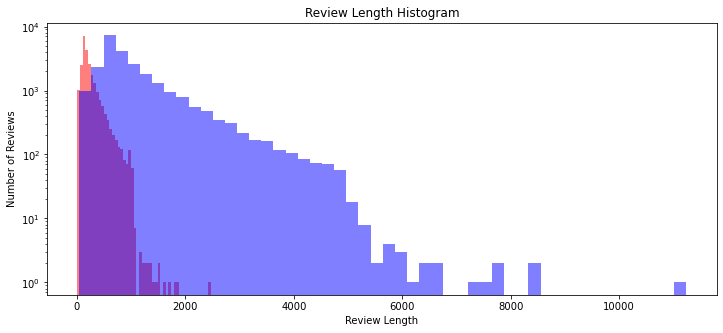

In [4]:
import matplotlib.pyplot as plt

# 사이즈 선언. (가로, 세로) 형태릐 튜플로 입력
plt.figure(figsize=(12,5))

plt.hist(review_len_by_token,bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
# 히스토그램 선언
# bins: 버킷의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨

plt.yscale('log', nonposy='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')


이 그래프는 문장 길이에 대한 분포이다. 빨간색은 단어 개수에 대한 히스토그램이고 파란색은 알파벳개수에 대한 길이이다.전체적인 분포를 볼수 있고 이상치 값을 확인할 수 있다. 이상치 값은 어떻게 해결하는지 나중에 보자.

다음엔 통계치로 수치화해보자.

In [5]:
import numpy as np

print(f'문장 최대 길이 : {np.max(review_len_by_token)}')
print(f'문장 최소 길이 : {np.min(review_len_by_token)}')
print(f'문장 평균 길이 : {np.mean(review_len_by_token)}')
print(f'문장 길이 표준편차 : {np.std(review_len_by_token)}')
print(f'문장 중간 길이 : {np.median(review_len_by_token)}')

print(f'제1사분위 길이 : {np.percentile(review_len_by_token,25)}')
print(f'제3사분위 길이 : {np.percentile(review_len_by_token,75)}')

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.7872
문장 길이 표준편차 : 173.72955740506563
문장 중간 길이 : 174.0
제1사분위 길이 : 127.0
제3사분위 길이 : 284.0


1사분위 3사분위는 $\frac{1}{4} , \frac{3}{4}$ 지점을 의미한다.

아래에서는 boxplot을 통해 살펴보자. 박스플롯이란 직관적인 시각화를 제공한다.
박스플롯에 대해 좀더 살펴보자면 

![boxplot](./img/boxplot.png)
출처 : https://www.researchgate.net/figure/Example-of-a-Box-and-Whisker-plot-for-the-standard-normal-distribution_fig3_267727216

boxplot을 잘 설명해주는 이미지라서 가져옴.
저 범위를 넘어서면 이상치(Outlier)라 볼수있음.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe373d3b850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe373d3bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe373d3b4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe373d41610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe373d41cd0>],
 'means': [<matplotlib.lines.Line2D at 0x7fe373d41970>]}

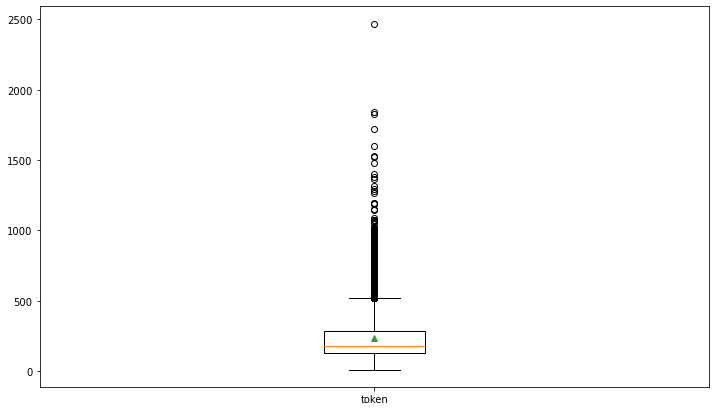

In [6]:
plt.figure(figsize=(12,7))
# 첫번째 인자 - 여러 분포에 대한 데이터리스트를 입력
# labels - 입력한 데이터에 대한 라벨
# showmeas - 평균값을 마크함
plt.boxplot([review_len_by_token],
           labels=['token'],
           showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe373d00880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe373d00f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe373d00520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe373d0d640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe373d0dd00>],
 'means': [<matplotlib.lines.Line2D at 0x7fe373d0d9a0>]}

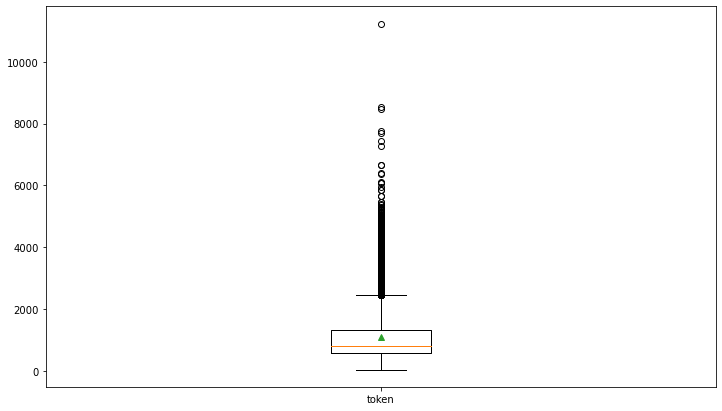

In [7]:
plt.figure(figsize=(12,7))
# 첫번째 인자 - 여러 분포에 대한 데이터리스트를 입력
# labels - 입력한 데이터에 대한 라벨
# showmeas - 평균값을 마크함
plt.boxplot([review_len_by_eumjeol],
           labels=['token'],
           showmeans=True)

이렇게 이상치가 많을것을 확인할 수 있다. 이렇게되면 범위가 너무 넓어 학습이 효율적이지 못하다.

다음은 워드클라우드로 확인해보자.

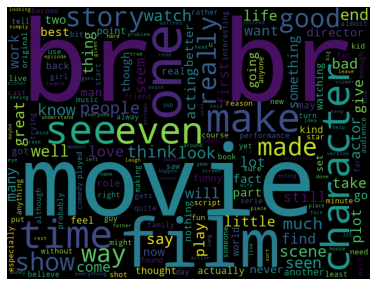

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=800,height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(12,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

보게되면 br이란 단어가 엄청 많다. 이는 데이터에 <br> 태그가 들어가있기 때문이다. 이는 제거해야할 내용이다.
마지막으로 긍정 부정 분포를 살펴보자.


/home/ubuntu/anaconda3/envs/tf2_nlp_study/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

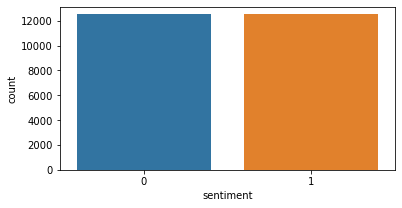

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])

긍정과 부정의 데이터가 같다. 균형이 좋다는 뜻이다.  

---------------

하지만 앞으로 만나게 될 모든데이터가 이렇게 균형이 좋지 않을것이다. 균형이 좋지 않은 데이터는 어떻게 처리하는지 5장에서 보자.  

끝